In [1]:
!pip install networkx pennylane pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 42.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 10.0 MB/s eta 0:00:0000:01


In [3]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from adiaframe import Hamiltonian
from adiaframe import utils_c as uc

/tmp/ipykernel_4690/728939331.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


OSError: /workspaces/OpenHackathon/module/AdiaFrame/adiaframe/c_modules/libutilsc.so: invalid ELF header

In [10]:
#Build your custom Hamiltonian with
import pennylane as qml

# 2 sites XXZ spin-1/2 chain (PBC)

coeffs_X = -0.5*np.ones(3)
coeffs_Z = np.ones(3)
coeffs = np.concatenate([coeffs_X, coeffs_Z])

print(coeffs)
ops = [qml.PauliX(0) @ qml.PauliX(1), qml.PauliX(1) @ qml.PauliX(2), qml.PauliX(2) @ qml.PauliX(0),
    qml.PauliZ(0) @ qml.PauliZ(1), qml.PauliZ(0) @ qml.PauliZ(1), qml.PauliZ(0) @ qml.PauliZ(1)]

H_XXZ = qml.Hamiltonian(coeffs, ops) 
H_XXZ = np.matrix(qml.matrix(H_XXZ))
print(H_XXZ)
#H = #np.array(...) 2D matrix
hamiltonian = Hamiltonian(H_XXZ, commute_map=True)
# or 
# pauli_sample = {"Pstring": coefficient, ...}
# H = Hamiltonian.p_poly_to_H(pauli_sample)
# hamiltonian = Hamiltonian(H, pauli_basis=pauli_sample, commute_map=True)

[-0.5 -0.5 -0.5  1.   1.   1. ]
[[ 3. +0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j  3. +0.j -0.5+0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [ 0. +0.j -0.5+0.j -3. +0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -3. +0.j  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -0.5+0.j  0. +0.j -3. +0.j  0. +0.j  0. +0.j -0.5+0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -3. +0.j -0.5+0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -0.5+0.j  3. +0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -0.5+0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j  3. +0.j]]


In [11]:
# See Pauli term and their coefficient:
hamiltonian.local_decomposition.tail(10)

,Pstring,type,Z,X,Coef
0,ZZI,0,6,0,3.0+0.0j
1,IXX,1,0,3,-0.5+0.0j
2,XIX,1,0,5,-0.5+0.0j
3,XXI,1,0,6,-0.5+0.0j


The below properties are automatically generated.

In [12]:
hamiltonian.commute_map

,source,target,Zs,Xs,Zt,Xt,commute
0,ZZI,IXX,6,0,0,3,0
1,ZZI,XIX,6,0,0,5,0
2,ZZI,XXI,6,0,0,6,1
3,IXX,XIX,0,3,0,5,1
4,IXX,XXI,0,3,0,6,1
5,XIX,XXI,0,5,0,6,1


In [13]:
hamiltonian.graph_edge

,source,target,Zs,Xs,Zt,Xt,commute
0,ZZI,IXX,6,0,0,3,0
1,ZZI,XIX,6,0,0,5,0
2,ZZI,XXI,6,0,0,6,1
3,IXX,XIX,0,3,0,5,1
4,IXX,XXI,0,3,0,6,1
5,XIX,XXI,0,5,0,6,1


TypeError: No matching signature found

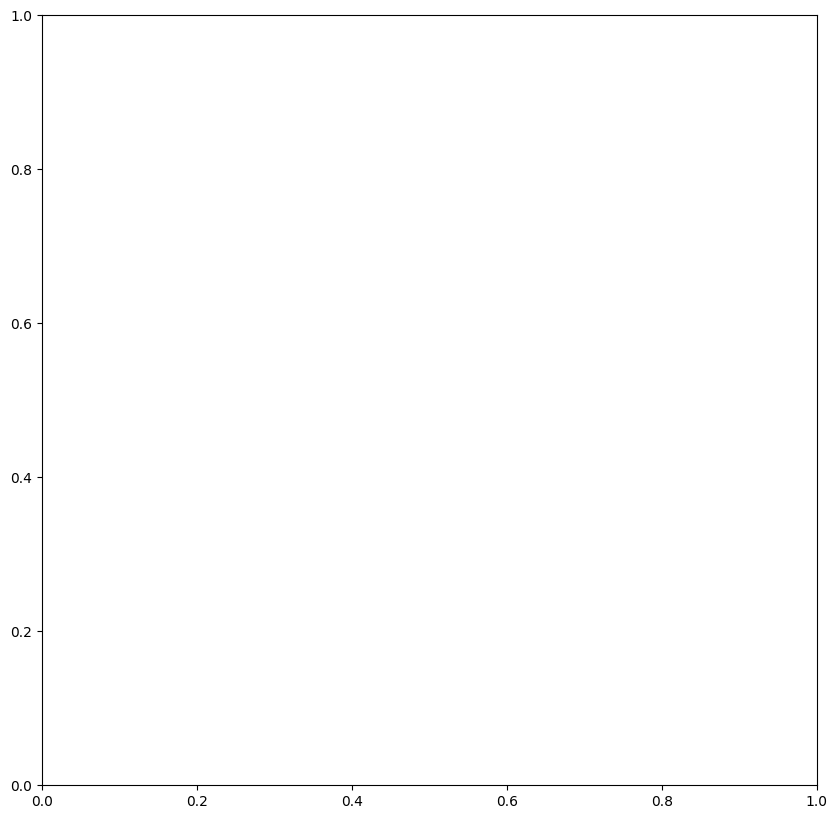

In [14]:
# See Latin matrix
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.spy(hamiltonian.latin_matrix, markersize=10)
ax.set_xlabel("Z family")
ax.xaxis.set_label_position('top') 
ax.set_ylabel("X family")

In [15]:
qubit = hamiltonian.qubit_num # number of qubits

In [16]:
from adiaframe import graph_op

In [17]:
G_b = graph_op.get_binary_graph(hamiltonian) # get commuting graph

In [18]:
from copy import deepcopy
from networkx.algorithms.approximation import max_clique 
# It only works for binary graph indicating commuting map.

In [19]:
g_classic = deepcopy(G_b)
max_cliques = []
while len(g_classic.nodes) >0:
    clique = max_clique(g_classic)
    max_cliques.append(clique)
    for node in clique:
        g_classic.remove_node(node)

In [20]:
print("Classic Clique solver:")
print("Partition:", len(max_cliques))
for c in max_cliques:
    print(len(c), end=", ")
print("============================================")
for c in max_cliques:
    print(c)

Classic Clique solver:
Partition: 2
2, 2, ============================================
{'XIX', 'IXX'}
{'XXI', 'ZZI'}
